# **SCC0276 - Aprendizado de Máquina**

**Trabalho:** Parte 2

**Docente:** Fernando Pereira dos Santos

**Alunos:**

* Otávio Cury Pontes  **Nº USP:** 10716525

* Daniel Bernardes Pozzan **Nº USP:** 10716608

**Universidade de São Paulo (USP)**


In [1]:
import pandas as pd
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/My Drive/USP/ML/Trabalho/heart_2020_cleaned.csv')

data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64
-----------------------------------------------------------
count    319795.00000
mean          3.37171
std           7.95085
min           0.00000
25%           0.00000
50%           0.00000
75%           2.00000
max          30.00000
Name: PhysicalHealth, dtype: float64
-----------------------------------------------------------
count    319795.000000
mean          3.898366
std           7.955235
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: MentalHealth, dtype: float64
-----------------------------------------------------------
count    319795.000000
mean          7.097075
std           1.436007
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.0

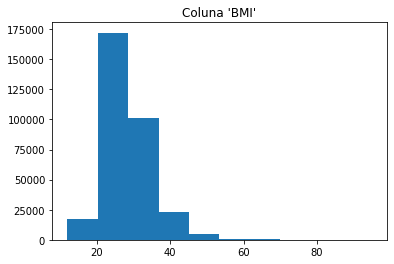

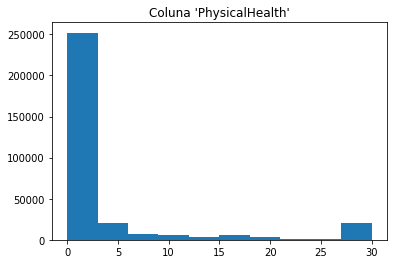

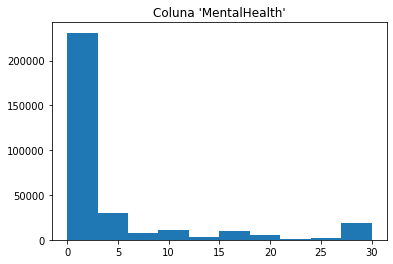

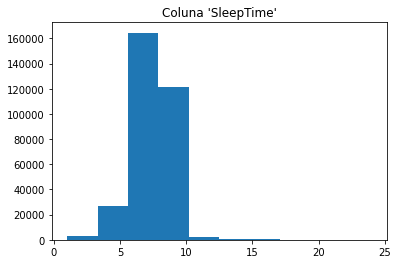

<Figure size 432x288 with 0 Axes>

In [6]:
#Análise exploratória dos dados quantitativos com histogramas
import numpy as np
import matplotlib.pyplot as plt

col_quant = [1,5,6,14]

for i in col_quant:
  data_sub = data.iloc[:,i]
  plt.title("Coluna '{}'".format(data.columns[i]))
  print(data_sub.describe())
  print("-----------------------------------------------------------")
  plt.hist(data_sub)
  plt.figure()

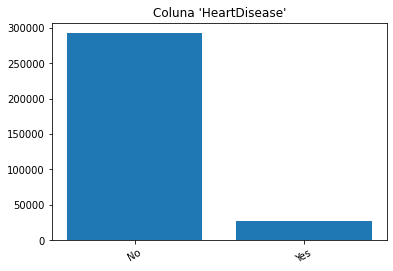

No     292422
Yes     27373
Name: HeartDisease, dtype: int64


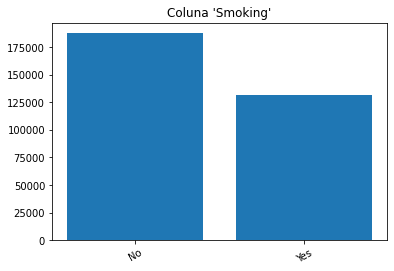

No     187887
Yes    131908
Name: Smoking, dtype: int64


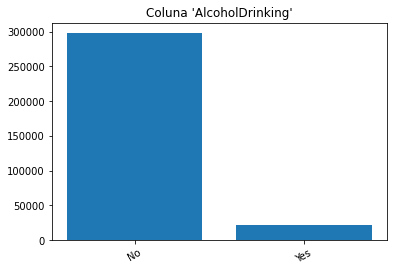

No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64


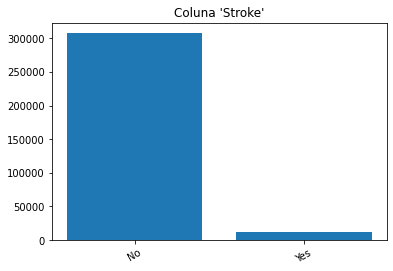

No     307726
Yes     12069
Name: Stroke, dtype: int64


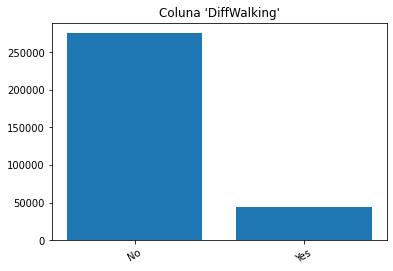

No     275385
Yes     44410
Name: DiffWalking, dtype: int64


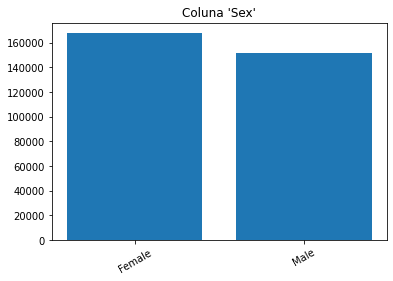

Female    167805
Male      151990
Name: Sex, dtype: int64


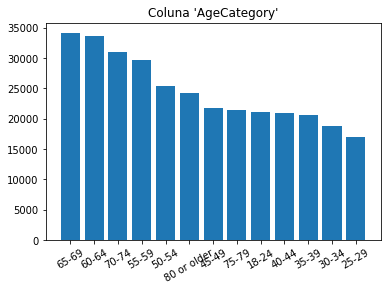

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64


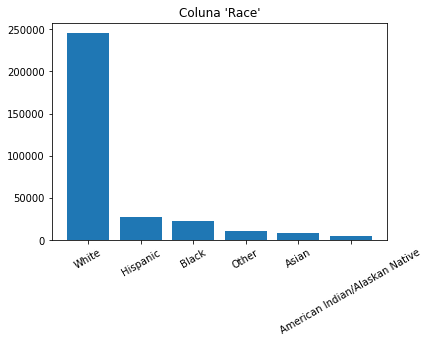

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64


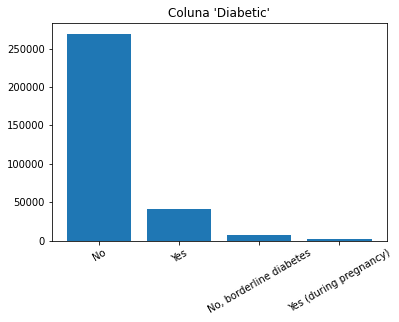

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64


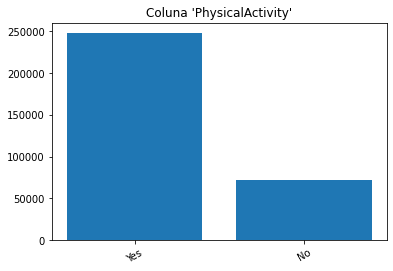

Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64


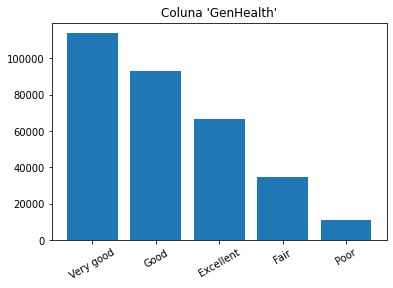

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64


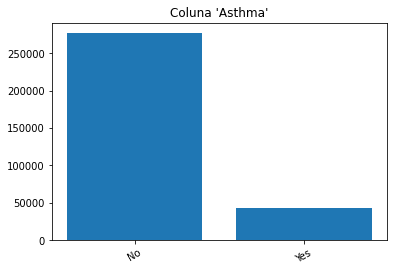

No     276923
Yes     42872
Name: Asthma, dtype: int64


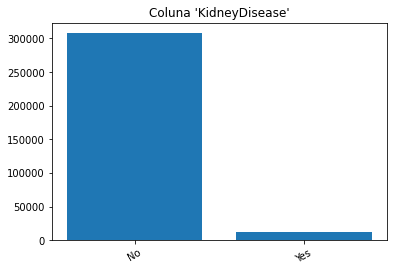

No     308016
Yes     11779
Name: KidneyDisease, dtype: int64


In [ ]:
#Análise exploratória dos dados qualitativos com gráficos de frequência

col_qual = [i for i in list(range(0,17)) if i not in col_quant]

for i in col_qual:
  data_sub = data.iloc[:,i]
  plt.title("Coluna '{}'".format(data.columns[i]))
  plt.bar(x=data_sub.value_counts().index, height=data_sub.value_counts())
  plt.xticks(rotation=30)
  plt.show()
  print(data_sub.value_counts())

# Tratamento dos dados

Os dados serão tratados com relação a:

*   Codificação
*   Desbalanceamento
*   Pontos aberrates
*   Normalização

In [7]:
#Transformando 'Yes' e 'No' em booleanos (exceto coluna 'Diabetes', que tem condicionais)
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for i in [0,2,3,4,7,12,15,16,17]:
  data.iloc[:,i] = LE.fit_transform(data.iloc[:,i])

data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,No,1,Very good,8.0,0,0,0


In [8]:
#One-hot encoding com as outras variáveis qualitativas
data = pd.get_dummies(data, columns = ['Sex', 'AgeCategory', 'Race', 'Diabetic', 'GenHealth'])
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,1,5.0,...,1,0,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,7.0,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,8.0,...,1,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,6.0,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,1,8.0,...,1,1,0,0,0,0,0,0,0,1


In [9]:
c_data = data
# Outliers das variáveis quantitativas
for column in ['BMI','PhysicalHealth','MentalHealth','SleepTime']:
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1

  print("IQR = %.2f" % IQR)

  # apenas outliers segundo IQR
  dataout_iqr = c_data[(c_data[column] < Q1-(IQR*1.5)) | (c_data[column] > Q3+(IQR*1.5))]
  print("Outliers:", len(dataout_iqr))

  # apenas inliers segundo IQR
  c_data = c_data[(c_data[column] >= Q1-(IQR*1.5)) & (c_data[column] <= Q3+(IQR*1.5))]
  print("Inliers:", len(c_data))

IQR = 7.39
Outliers: 10396
Inliers: 309399
IQR = 2.00
Outliers: 43924
Inliers: 265475
IQR = 3.00
Outliers: 32157
Inliers: 233318
IQR = 2.00
Outliers: 2298
Inliers: 231020


In [10]:
# Balanceamento dos dados:
# Objetivo: igualar o número de pacientes com e sem doenças cardiovasculares
import sklearn.model_selection as ms
import numpy as np
from imblearn.under_sampling import ClusterCentroids

c_data = data
y = c_data['HeartDisease']
X = c_data.drop('HeartDisease',1)

# Pelo tamanho da base de dados, dividiremos utilizaremos uma amostra da base de dados original
X_1, X_2, y_1, y_2 = ms.train_test_split(X, y, train_size=0.21, test_size=0.01, random_state=1)

(unique, counts) = np.unique(y_1, return_counts=True)

print("Número de pacientes sem doenças cardiovasculares: ", counts[0])
print("Número de pacientes com doenças cardiovasculares: ", counts[1])

print("Reduzindo a classe majoritária...")
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_1, y_1)

(unique, counts) = np.unique(y_resampled, return_counts=True)
print("Número de dados na amostra:", (counts[0] + counts[1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


Número de pacientes sem doenças cardiovasculares:  61540
Número de pacientes com doenças cardiovasculares:  5616
Reduzindo a classe majoritária...
Número de dados na amostra: 11232


In [25]:
# Normalização dos dados

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

n_data =  X_resampled

n_data[['BMI','PhysicalHealth','MentalHealth','SleepTime']] = mms.fit_transform(n_data[['BMI','PhysicalHealth','MentalHealth','SleepTime']])

# Salvando amostra de dados
# Se não desejar salvar a amostra, basta comentar aa linhas abaixo
n_data.to_csv('/content/drive/My Drive/USP/ML/Trabalho/n_data.csv', index = False)
y_resampled.to_csv('/content/drive/My Drive/USP/ML/Trabalho/y_resampled.csv', index = False)

In [26]:
n_data.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,Asthma,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0.249619,0,0,0,7.401487e-17,3.703704e-03,0,0,0.287440,0,...,0,1,0,0,0,0,0,1,0,0
1,0.197588,0,0,0,1.111111e-01,3.333333e-01,0,1,0.188406,0,...,0,0,0,0,0,0,0,0,0,0
2,0.286374,0,0,0,1.000000e+00,8.881784e-17,0,1,0.289855,0,...,0,0,0,0,0,0,0,0,0,0
3,0.292639,0,0,0,7.777778e-02,1.000000e+00,0,0,0.130435,0,...,0,1,0,0,0,0,0,0,0,0
4,0.165877,0,0,0,2.960595e-17,2.960595e-17,0,0,0.312253,0,...,0,0,0,0,0,1,0,0,0,0


In [40]:
# Utilizaremos KNN para predição. Para isso, primeiro devemos separar os atributos do rótulo, que será 'HeartDisease'
import sklearn.model_selection as ms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Carregando amostra de dados
# Se não desejar carregar a amostra, basta comentar as linhas abaixo
n_data = pd.read_csv('/content/drive/My Drive/USP/ML/Trabalho/n_data.csv')
y_resampled = pd.read_csv('/content/drive/My Drive/USP/ML/Trabalho/y_resampled.csv')

y = y_resampled
X = n_data

#Pelo tamanho da base de dados, dividiremos a base em duas, e subsequentemente em 70% treino, 30% teste
train_holdout, validation, rot_train_hold, rot_val = ms.train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=2)

n = [1,2,3]

for k in n:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_holdout, rot_train_hold.values.ravel())

    knn_val = knn.predict(validation)

    score = accuracy_score(rot_val, knn_val)
    tn, fp, fn, tp = confusion_matrix(rot_val, knn_val).ravel()
    f1 = f1_score(rot_val, knn_val, average = 'binary')

    print("k={}:".format(k))
    print("Acurácia: %.3f" % (100*score),"%")
    
    print("Nº Falsos Negativos: ",fn)
    print("Nº Falsos Positivos: ",fp)
    print("Nº Verdadeiros Negativos: ",tn)
    print("Nº Verdadeiros Positivos: ",tp)
  
    print("F1-score: %.3f" % (100*f1),"%")
    print("----------------------------------------------------------")

#Conclusão: não há necessidade de usar um n muito grande, pois n=5 deu pior que n=3 e demorou mais

k=1:
Acurácia: 91.602 %
Nº Falsos Negativos:  145
Nº Falsos Positivos:  138
Nº Verdadeiros Negativos:  1566
Nº Verdadeiros Positivos:  1521
F1-score: 91.489 %
----------------------------------------------------------
k=2:
Acurácia: 90.119 %
Nº Falsos Negativos:  244
Nº Falsos Positivos:  89
Nº Verdadeiros Negativos:  1615
Nº Verdadeiros Positivos:  1422
F1-score: 89.518 %
----------------------------------------------------------
k=3:
Acurácia: 93.175 %
Nº Falsos Negativos:  95
Nº Falsos Positivos:  135
Nº Verdadeiros Negativos:  1569
Nº Verdadeiros Positivos:  1571
F1-score: 93.179 %
----------------------------------------------------------


In [36]:
#Naive-Bayes
from sklearn.naive_bayes import GaussianNB

#Utilizando mesmo conjunto para KNN
nbHeart = GaussianNB().fit(train_holdout, rot_train_hold.values.ravel())
predHeart = nbHeart.predict(validation)

score = accuracy_score(predHeart, rot_val)
tn, fp, fn, tp = confusion_matrix(rot_val, predHeart).ravel()
f1 = f1_score(rot_val, predHeart, average = 'binary')

print('Acurácia com Naive-Bayes: {}%'.format(100*round(score,4)))
print("Nº Falsos Negativos: ",fn)
print("Nº Falsos Positivos: ",fp)
print("Nº Verdadeiros Negativos: ",tn)
print("Nº Verdadeiros Positivos: ",tp)
print("F1-score: %.3f" % (100*f1),"%")

Acurácia com Naive-Bayes: 92.61%
Nº Falsos Negativos:  63
Nº Falsos Positivos:  186
Nº Verdadeiros Negativos:  1483
Nº Verdadeiros Positivos:  1638
F1-score: 92.936 %
